Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 01: Image Enhancement & Color

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available at the beginning of the week and are supposed to be solved in groups. They have to be handed in before the next practice session (Monday evening). The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before end of **Monday, November 17, 2024**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Computing Contrast and Entropy (5 points)


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

255 255 0


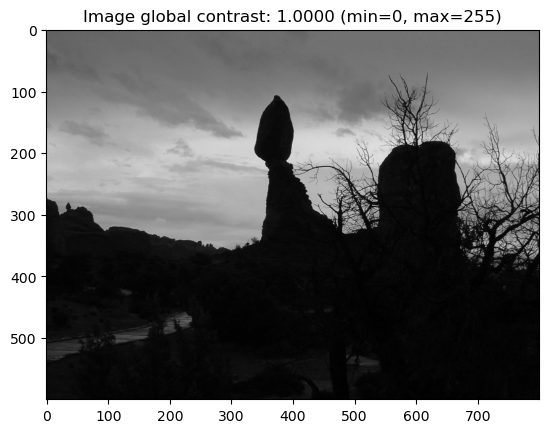

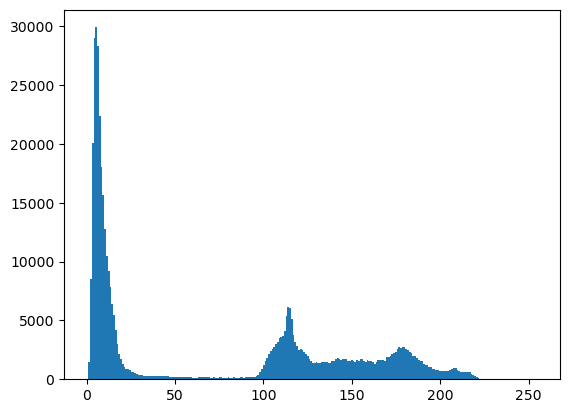

In [9]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The global contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)
    R = value_range[1]-value_range[0]
    contrast = (np.max(img)-np.min(img))/R
    print(R,np.max(img),np.min(img))
    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

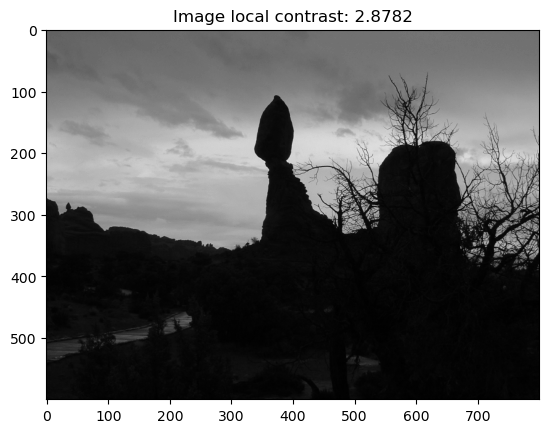

In [10]:
import numpy as np

def local_contrast(img):
    """
    Compute the local contrast for a given image using numpy slicing.
    
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image.
    """
    
    # Initialize arrays to accumulate the sum and count of neighbors
    neighbor_sum = np.zeros_like(img, dtype=float)
    neighbor_count = np.zeros_like(img, dtype=float)
    
    # Update sum and count for neighbors in all four directions
    neighbor_sum[1:, :] += img[:-1, :]  # Top
    neighbor_sum[:-1, :] += img[1:, :]  # Bottom
    neighbor_sum[:, 1:] += img[:, :-1]  # Left
    neighbor_sum[:, :-1] += img[:, 1:]  # Right

    # Valid neighbors
    neighbor_count[1:, :] += 1  # Top
    neighbor_count[:-1, :] += 1  # Bottom
    neighbor_count[:, 1:] += 1   # Left
    neighbor_count[:, :-1] += 1   # Right
    
    # Compute the mean of the neighbors
    neighbor_mean = neighbor_sum / neighbor_count
    
    # Calculate the sum of absolute differences between the pixel and its neighbors
    contrast_sum = np.sum(np.abs(img - neighbor_mean))

    
    # Normalize by the total number of pixels
    return contrast_sum / img.size


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()
x = np.arange(10)

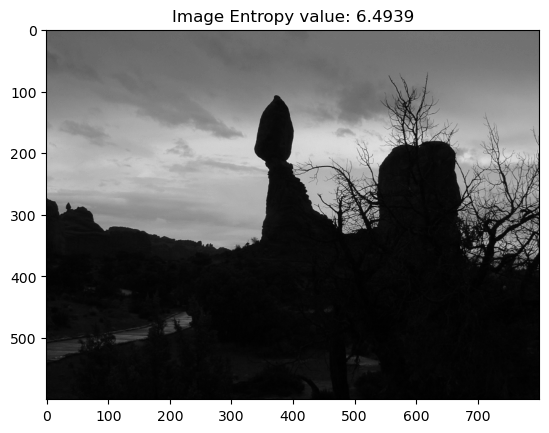

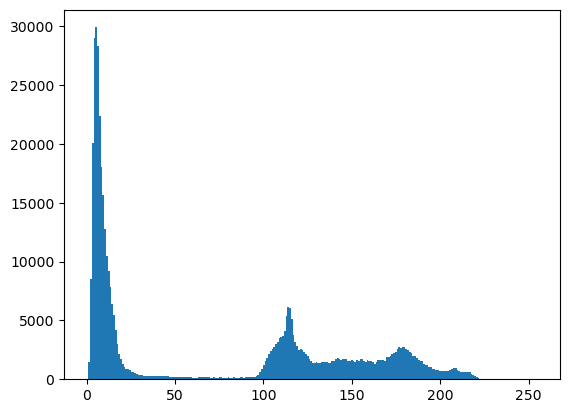

In [12]:
%matplotlib inline
import numpy as np
import math
from imageio.v2 import imread
import scipy.stats

import numpy as np

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    
    # Calculate the histogram of pixel intensities (grayscale values)
    hist, bin_edges = np.histogram(img_flat, bins=256, range=(0, 256), density=True)
    
    # Remove zero values from the histogram to avoid log(0)
    hist = hist[hist > 0]
    
    # Compute the entropy using the formula
    entropy_value = -np.sum(hist * np.log2(hist))
    return entropy_value
    

    # Probs from scratch
    #img=img.flatten()
    #probability=[np.count_nonzero(img==i)/img.size for i in range(0,256)]
    #ent=-np.sum([p*np.log2(p) for p in probability if p>0])
    #return ent
    

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

assert math.isclose(entropy(img), scipy.stats.entropy(np.unique(img.flat, return_counts=True)[1], base=2))

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

255 255 0


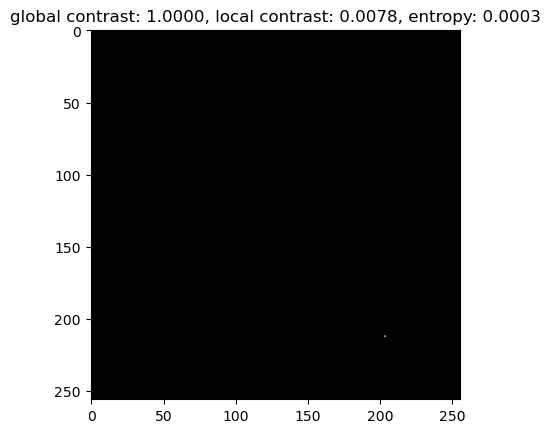

255 110 100


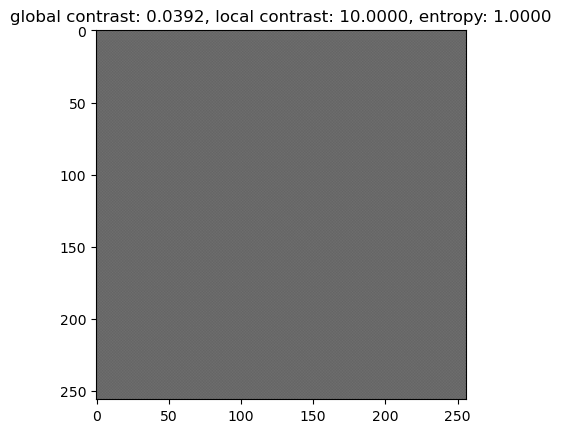

255 255 0


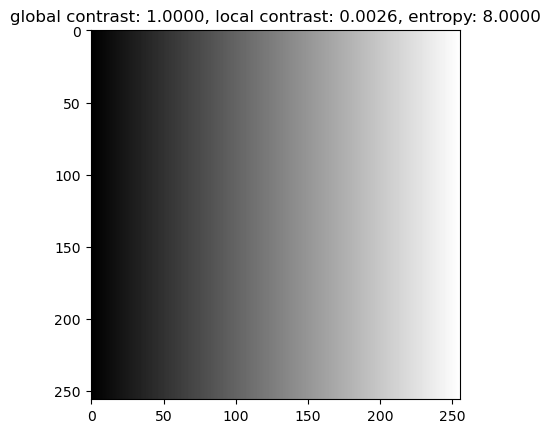

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


# Create an empty image of size 256x256 with uint8 data type
img1 = np.zeros((256, 256), dtype=np.uint8)


# Choose random positions for two pixels to maximize global contrast
pos_0 = np.random.randint(0, 256, size=2)  
pos_1 = np.random.randint(0, 256, size=2)  

# value_range
value_range = (0, 255) if img1.dtype == np.uint8 else (0., 1.)

img1[pos_0[0], pos_0[1]] = value_range[0]
img1[pos_1[0], pos_1[1]] = value_range[1]


# Local contrast is low, because there are only two pixels with values, not even being in the same block (if we are lucky)
image_info(img1)


img2 = np.zeros((256, 256),np.uint8)
img2[::2, ::2] = 100
img2[1::2, 1::2] = 100
img2[::2, 1::2] = 110
img2[1::2, ::2] = 110
            
image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
for i in range(0,256):
    img3[:,i]=i
image_info(img3)

## Assignment 2: Contrast enhancement (5 points)

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast is the difference of intensity in an image. Low contrast is caused when the difference between colors in the image is too low. This makes it difficult to distinguish objects from their surroundings because the border is not prominent. Low contrast is not a problem when we are looking to reduce noise or to simplify an image for processing. We can enhance contrast by applying HE.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

Histogram equalization applies a transform function to redistribute the intensity of the image uniformly. It improves information content of the image.

In the continues case, the range of gray values is infinite. We calculate Cumulative distributive function by integrating from 0 to r where r in a random number over a probabilistic function.

Entropy is a measure of randomness in the system. In histogram equalisation higher entropy means higher information content so we try to maximise entropy. It is highest for a uniform distribu


Histogram equalization stretches the image across the entire value range by applying the cumulative distribution function (CDF). This process redistributes the pixel intensity values so that they cover the full spectrum, typically from 0 to 255 in an 8-bit image. By doing so, it enhances the contrast of the image, making details more visible, especially in areas that were previously too dark or too bright. The enhanced spectrum leads to a more even distribution of the image's histogram, which reduces intensity clustering and thereby increases its entropy.
tion

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-02 slides 29-32).

-Loss of Detail: May blur fine details, especially in regions with low contrast

-Noise Amplification: It can enhance noise, especially in areas with localized intensity variations

-Limited grayscale levels (e.g., 256 for 8-bit) may cause rounding errors and loss of precision

-It may stretch less significant areas

1.Write frequency distribution for each gray value upto the number of bits required to represent the maximum gray value in the image. Ex- Max gray value = 7 then 2^3 = 8. So we need 8 bits. 

2.Write frequency distribution for gray values from 0 to 7

3.Calculate probability of each gray value = frequency/sum of frequencies

4.Calculate cumulative probability

5.Multiply it with the bits (in this case 8)

6.Approximate it to nearest integer

## Assignment 3: Adaptive Histogram Equalization (5 points)

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994](Zuiderveld-1994.pdf). You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

Our vision is adapted to local contexts of an image. So instead of applying histogram equalisation to the entire image, we split it into multiple contexts (the ideal number is determined by experiments and type of image) and we then apply histogram equalisation to each region independently. But this sometimes introduces noise when the context is homogenous.


AHE applies normal histogram equalization in a local context. For a 512x512 image, Zuiderveld (1994) proposed dividing it into 8x8 regions. This approach preserves the local context of the image and helps to enhance the visibility of different regions. The main drawback is the amplification of noise in relatively homogeneous image areas, as the algorithm always attempts to stretch the pixel values across the entire intensity range.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

CLAHE is used to solve the noise problem of AHE. There is usually a threshold to number of pixels in each bin of the histogram. Once it is full, it is clipped and redistributed.

CLAHE limits the contrast enhancement within each region by setting a threshold (contrast limit). This prevents the algorithm from over-amplifying noise in areas with little variation, producing a more balanced contrast enhancement across the image without making homogeneous areas appear overly grainy.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

Since the computation of a histogram for every pixel is slow for large images, the image is divided into patches, and the histogram is calculated for each patch. The pixels are then mapped according to the regional cumulative distribution function (CDF). This approach may not lead to exactly the same result as calculating the histogram for each pixel, but the variation in the value range within a small window is typically small enough that the overall effect remains visually consistent.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-02, slide 24).

In [16]:
%matplotlib inline
from skimage import data, exposure, img_as_float
from imageio.v2 import imread
import matplotlib.pyplot as plt

img = imread('images/canada.png', pilmode='L')

img_he = exposure.equalize_hist(img)
img_ahe = exposure.equalize_adapthist(img,clip_limit=0)
img_clahe = exposure.equalize_adapthist(img,clip_limit=0.001) 

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 255))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 255))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 255))

plt.show()

NameError: name 'exposure' is not defined

## Assignment 4: Colormaps (5 points)

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

Sequential - It is used to represent ordered data, with change in hue or saturation often with a single color.
Diverging - It is used to represent data that has a critical middle value or deviation around 0 with two colors meeting in the middle.
Qualitative - It is used for unordered data and uses miscellaneous colors

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-02, slide 43):

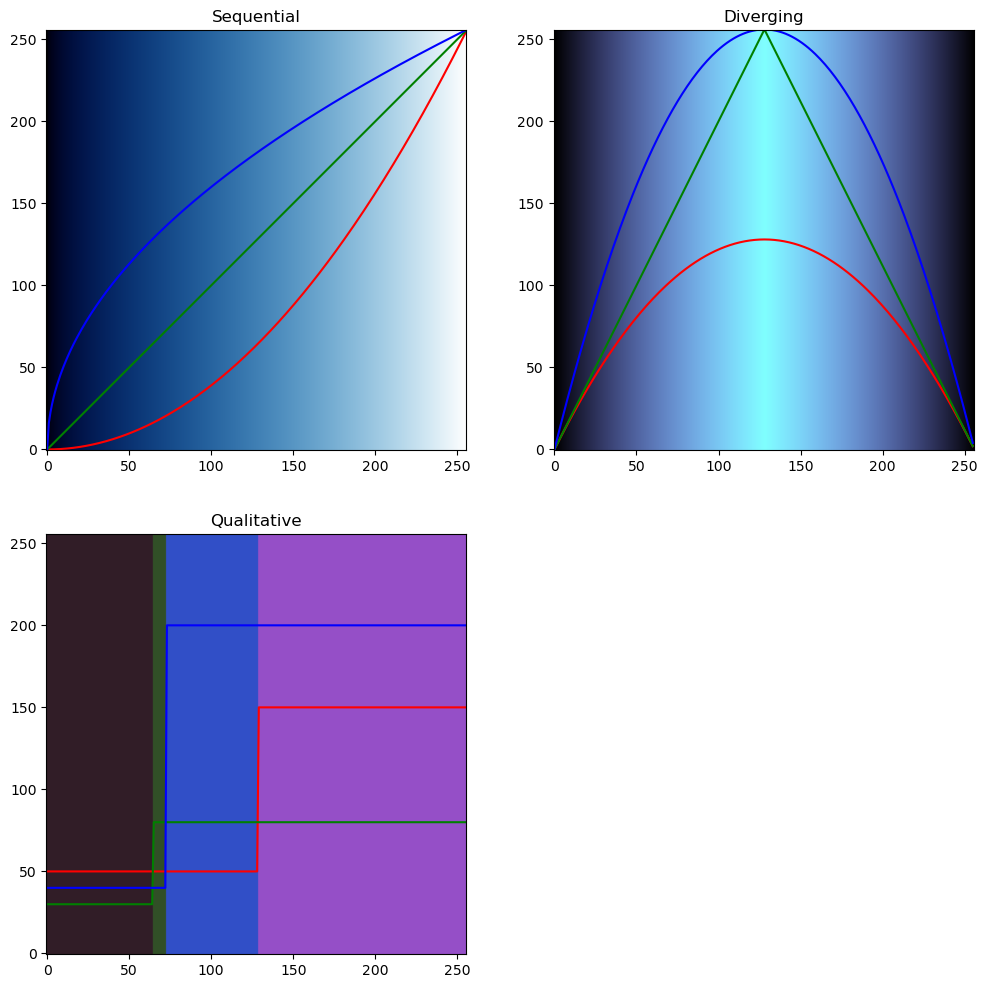

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

colors = []

colors.append((np.asarray((lambda x: (x**2)/256 ,
                           lambda x: x,
                           lambda x: 16 * np.sqrt(x))
                          ),"Sequential"))

colors.append((np.asarray((lambda x:  - (1 / 128) * (x - 128)**2 + 128,
                           lambda x: 256 - 2 * np.abs(x - 128),
                           lambda x: - (1 / 64) * (x - 128)**2 + 256)
                          ),"Diverging"))

colors.append((np.asarray((lambda x: np.where(x <= 128, 50,150) ,
                           lambda x: np.where(x <= 64, 30,80),
                           lambda x: np.where(x <= 72, 40, 200))
                          ),"Qualitative"))

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i, (color, label) in enumerate(colors):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[0](gray), 'red')
    plt.plot(gray, color[1](gray), 'green')
    plt.plot(gray, color[2](gray), 'blue')
    plt.imshow(np.stack([color[0](a),color[1](a),color[2](a)],axis=2)/256, origin='lower')
    plt.title(label)
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  
\begin{pmatrix} \lambda ^ \gamma \\ \lambda ^ \gamma \\ \lambda ^ \gamma \end{pmatrix} + a \begin{pmatrix}-0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \phi \\ \sin \phi\end{pmatrix}$$
with $\phi = 2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)$ and $ a = \frac{\text{hue}\cdot \lambda ^ \gamma \cdot( 1 - \lambda ^ \gamma)}{2}$ (with 'start\_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

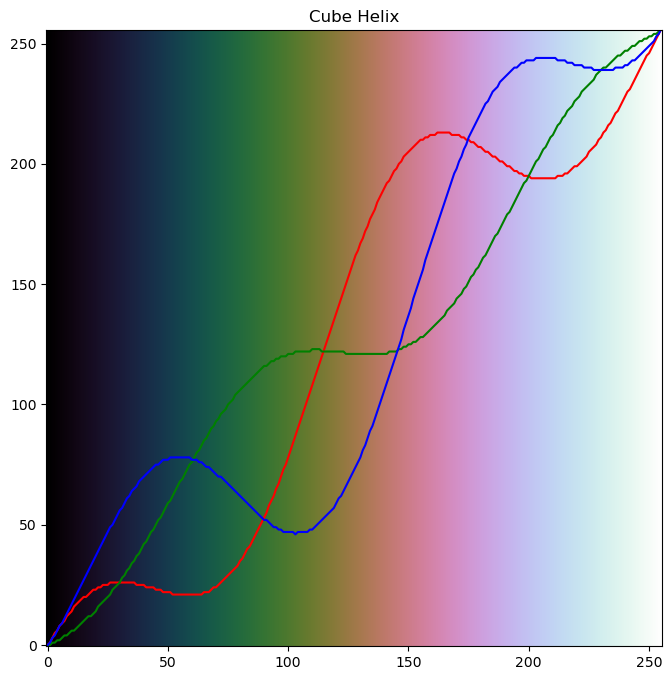

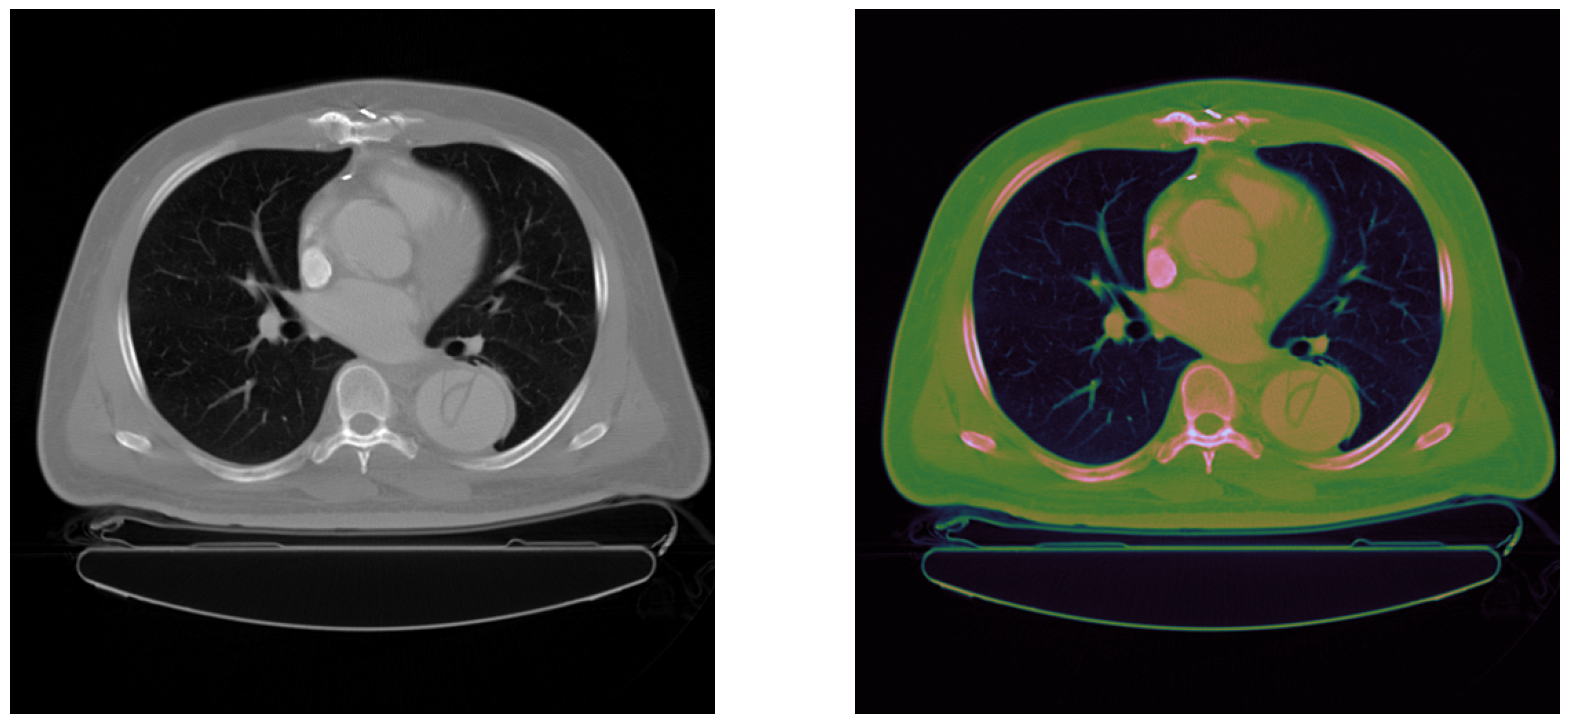

In [8]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt

start_color = 0.5
rotations = -1.5
hue = 1
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        lda=i/255.0
        phi=2*np.pi*(start_color/3+rotations*lda)

        # Scaled lamda value
        lda_scaled = np.power(lda, gamma)
        alpha=(hue*lda_scaled*(1-lda_scaled))/2
        
        # For each channel
        lookup_table[i, 0] = lda_scaled + alpha * (m[0, 0] * np.cos(phi) + m[0, 1] * np.sin(phi))  
        lookup_table[i, 1] = lda_scaled + alpha * (m[1, 0] * np.cos(phi) + m[1, 1] * np.sin(phi)) 
        lookup_table[i, 2] = lda_scaled + alpha * (m[2, 0] * np.cos(phi) + m[2, 1] * np.sin(phi))  
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

int_table = (lookup_table*256).astype(int)
plt.figure(figsize=(8,8))
plt.plot(gray, int_table[gray,0], 'red')
plt.plot(gray, int_table[gray,1], 'green')
plt.plot(gray, int_table[gray,2], 'blue')
plt.imshow(np.stack([int_table[a,0],int_table[a,1],int_table[a,2]],axis=2)/256, origin='lower')
plt.title("Cube Helix")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')

The Jet colormap does not represent the actual intensity of the gray values in a linear way due to its non-linear color mapping. This causes significant shifts in hue even for small changes in the gray value, leading to a misleading representation of intensity. These abrupt color transitions can make it harder to interpret the data accurately, especially in areas with small variations in intensity. Additionally, in black-and-white printing, it can cause a loss of detail, as the color gradients are not directly correlated with perceived luminance.

In contrast, the Cube Helix colormap is designed to fit the colors based on perceived luminance. It progresses smoothly from black to white, with a perceptually uniform transition that is much more accurate for data representation. The intensity of the colors in Cube Helix is directly correlated with brightness, making it a better choice for grayscale printing, where the output relies mainly on luminance. This smooth, continuous transition is especially beneficial when the colormap is used to visualize data in a way that needs to be understood in terms of brightness, rather than hue.